## Finite Difference Derivative Approximations - Chapter 14, McClarren

In introductory calculus, students are taught that the derivative of a function is defined via
the limit:

$$ f'(x) = \frac{\partial f}{\partial x} = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}. $$

On a computer we want to compute derivatives, but we cannot evaluate the derivative using
an infinitesimally small value for $h$ due to finite precision arithmetic. In this chapter we will
derive formulas called finite difference derivatives because h will have a finite value rather
than an infinitesimally small one. In one formula we will approximate the derivative in the
same manners as the above equation using

$$ f'(x) \approx \frac{f(x+h) - f(x)}{h}. $$

The error we incur in doing so we also be discussed.

### Taylor Series and Big-O Notation

We can approximate a function f (x) near a point x using the Taylor series:

$$ f(x+h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x) + \cdots + \frac{h^n}{n!} f^{(n)}(x) $$

The Taylor series is an infinite sum. One way that this is commonly written is using a particular
notation instead of the “$\cdots$”:

$$ f(x+h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x) + O(h^4). $$

What the $O(h^4)$ means is that the rest of the terms will be smaller than some constant times $h^4$
as $h \rightarrow 0$ .We can see this through a simple example. Here we look at the approximation of

$$ \cos{h} = \cos{0} + h \sin{0} + - \frac{h^2}{2}\cos{0} + \frac{h^3}{6}\sin{0} + O(h^4).$$

Below we plot the both the function and its approximation.

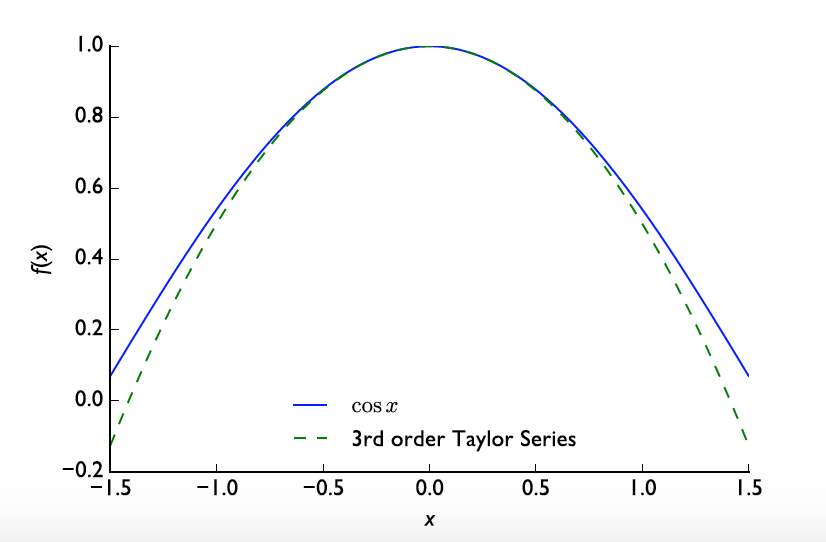

The absolute difference between $\cos{h}$ and the third-order Taylor series as a function of $h$
on a log-log scale is shown next. It appears to be a line with a slope that is approximately 4.

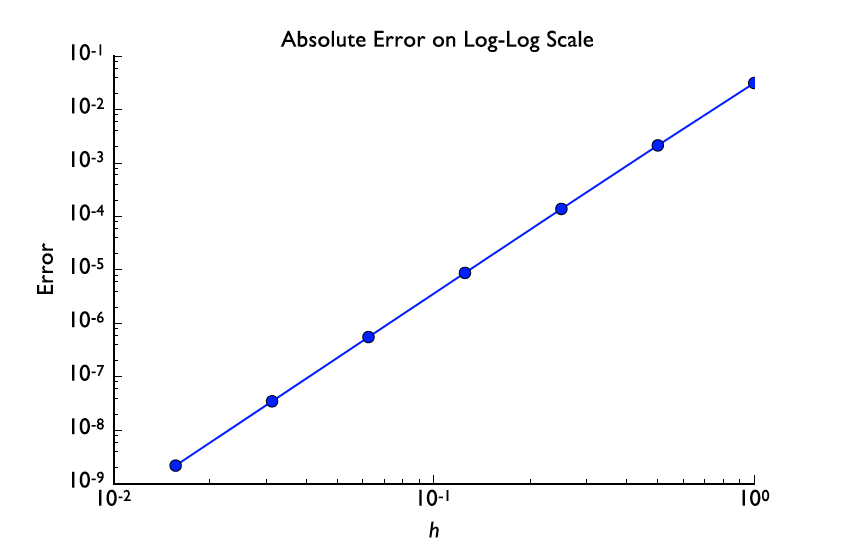

You might ask yourself, why is the slope 4? This can be answered by looking at the equation
for the error:

$$f(x+h) - \left(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x)\right) = C h^4 + O(h^5) $$,

in this equation we have used the fact that $O(h^4)$ means some constant, which here we call $C$,
times $h^4$. The remaining terms we have written as $O(h^5)$. When we take the absolute value and the logarithm of each side we get

$$ \log_{10} \left| f(x+h) - \left(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x)\right) \right| \approx \log_{10} \left| C \right| + 4 \log_{10} h, $$

which is a line with slope 4. The constant tells us what level the curve starts out at when
$h = 1$. This formula is approximate because we have left out the $h^5$ and higher terms, which
we assume to be small since h is small in our demonstration above.

The we have already seen the concept of Big-O notation when we discussed the scaling
Gaussian Elimination, saying that it scaled as $O(n^3)$ where n was the number of equations in
the linear system. One difference is that in the algorithm scaling discuss we were concerned
about the scaling as $n \rightarrow \infty$, whereas here we are interested in $h \rightarrow 0$.

### Forward and Backward Difference Formulas

From the Taylor series at $x + h$,

$$ f(x+h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x) + O(h^4), $$

we notice that there is an $f'(x)$ term in the equation. If we “solve” for this derivative by
subtracting $f(x)$ from both sides and then dividing by $h$ we get

$$ \frac{f(x+h)-f(x)}{h} =  f'(x) + \frac{h}{2} f''(x) + \frac{h^2}{6} f'''(x) + O(h^3), $$

or in shorter form

$$ \frac{f(x+h)-f(x)}{h} =  f'(x) + O(h), $$

Therefore the approximation

$$ f'(x) = \frac{f(x+h)-f(x)}{h} $$

is an order h approximation because the error is proportional to $h$ as $h$ goes to 0. This is called
a forward difference formula because the function is evaluated $h$ forward of x to approximate
the derivative.

We did this using $f(x + h)$ in our formula, but we could have also used $f(x−h)$ which
has the Taylor series

$$ f(x-h) = f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6} f'''(x) + O(h^4), $$

to get the formula 

$$ \frac{f(x) - f(x-h)}{h} =  f'(x) + O(h). $$

Therefore the approximation

is also an order $h$ approximation because the error is proportional to $h$ as $h$ goes to 0. This
formula is a backward difference formula because the function is evaluated $h$ behind $x$.

### Higher-order approximations

Both of these formulas for the derivative are first-order in $h$. These formulas are fine, but
as we will see when we solve differential equations, first-order solutions typically have too
much error for our purposes. We desire a way of getting higher-order approximations to the
derivative. Here we will derive a second-order approximation using both

$$ f(x+h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x) + O(h^4), $$

and

$$ f(x-h) = f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6} f'''(x) + O(h^4). $$

If we subtract the $f(x-h)$ equation from the equation for $f(x+h)$ and then divide by $2h$, we get:

$$ \frac{f(x+h) - f(x-h)}{2h} =  f'(x) + \frac{h^2}{6} f'''(x) + O(h^4), $$

or in shorter form

$$ \frac{f(x+h) - f(x-h)}{2h} =  f'(x) + \frac{h^2}{6} f'''(x) + O(h^4), $$

Therefore the approximation

$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$

is an order $h^2$ approximation because the error is proportional to $h^2$ as h goes to 0. This formula
is called a *central-difference* formula because the function is evaluated around a center
of $x$ a value of $h$ on either side. One thing to note is that the error terms in this approximation
only have even powers of $h$ because of the way the odd powers cancel when combining the
two.

With a second-order approximation, if we cut $h$ in half, the error goes down by a factor
of 4, compared to a factor of 2 with a first-order method.

We could go through the process of obtaining even higher-order derivatives (third-order,
fourth-order, etc.), but in practice this is generally not useful because the formulas become
cumbersome and there are typically better ways of accomplishing higher-order accuracy. We
will see one of these ways shortly.

### Comparing the Approximations

Consider the function

$$f(x) = \arctan{(x)} \cosh{(x)} $$

and look at approximations to $f'(x)$ at $x = 1$. The actual answer is $f'(1) =
1.694541176517952557683135.$ In the following graph we show the error in the derivative
estimate as a function of $h$ for the three methods we have seen so far on a log-log scale.

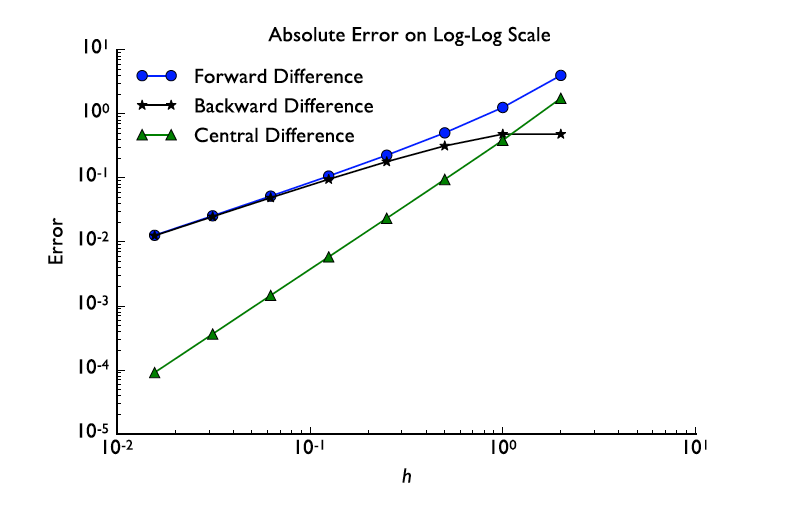

The central difference result has a slope of about 2, and the forward and backward
differences have a slope around 1 (1.01 and 0.989 between the last two points of each line for
the forward and backward difference, respectively).

In this example we see that the errors decay as expected for the two first-order methods
and the one second-order method. As we expect, as $h$ gets smaller the second-order method
wins out. Nevertheless, this does not mean that at a particular value of $h$ the second-order
method will have smaller error. The graph above shows that at $h = 2$, the backward 
difference approximation has the smallest error. This is due to the fact that order of the formula just
says how the error changes with $h$ and says nothing about the constant in front of the leading-order
term. Eventually, the second-order method will win, but we cannot say anything about
a particular point.

### Second Derivatives

We may also want to compute the value of $f''(x)$. To do this we start with the Taylor series
for $f(x+h)$ and $f(x−h)$:

$$ f(x+h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x) + O(h^4), $$

and

$$ f(x-h) = f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6} f'''(x) + O(h^4). $$

If we add these two equations together, notice that the $h$ and $h^3$ terms cancel:

$$ f(x+h) + f(x-h) = 2 f(x) + h^2 f''(x) + O(h^4). $$

Now rearranging this formula to solve for the second-derivative we get

$$ f''(x) = \frac{f(x+h) -2 f(x) + f(x-h)}{h^2} + O(h^2) $$

That is, we can get a second-order in $h$ approximation to the second derivative by evaluating
the function at $f(x)$ and $f(x\pm h)$.

Here's another derivative we will need to approximate with finite differences:

$$ \frac{d}{dx} D(x) \frac{d\phi}{dx} $$

This term appears in the diffusion equation for neutrons or other particles. To approximate
this, we first approximate $D(x+\frac{h}{2}) \phi'(x+\frac{h}{2})$ using a central difference with $\frac{h}{2}$ as

$$ D(x+\frac{h}{2}) \phi'(x+\frac{h}{2}) = D(x+\frac{h}{2}) \frac{\phi(x+h) - \phi(x)}{h} +O(h^2) $$

Doing the same with $D(x-\frac{h}{2}) \phi'(x-\frac{h}{2})$ gives

$$ D(x-\frac{h}{2}) \phi'(x-\frac{h}{2}) = D(x-\frac{h}{2}) \frac{\phi(x) - \phi(x-h)}{h} +O(h^2) $$

The final step involves writing

$$ \frac{d}{dx} D(x) \frac{d\phi}{dx} = \frac{1}{h} \left( D(x+\frac{h}{2}) \phi'(x+\frac{h}{2}) - D(x-\frac{h}{2}) \phi'(x-\frac{h}{2}) \right) + O(h^2) $$

which is a central difference formula as well. Putting all of our results together gives

$$ \frac{d}{dx} D(x) \frac{d\phi}{dx} = \frac{1}{h} \left( D(x+\frac{h}{2}) \frac{\phi(x+h) - \phi(x)}{h} - 
D(x-\frac{h}{2}) \frac{\phi(x) - \phi(x-h)}{h} \right) + O(h^2) $$

With a constant value of $D(x)$ this formula becomes

$$ \frac{d}{dx} D(x) \frac{d\phi}{dx} = \frac{D}{h^2} \left(\phi(x+h) - 2 \phi(x) + \phi(x-h) \right). $$

One outstanding question is what order is this approximation. It is fairly obvious that it is
second-order when $D$ is constant. It is tedious, but straightforward, to show that the error is
second-order in $h$ even when $D$ is changing.

What about higher derivatives? As we did in the diffusion operator, we can just apply the
same formula over and over until we get a derivative of any degree we like. We will not go
further into the higher-degree derivative formulas here because the formulae are usually for
specialized problems and can be generated easily. One thing to note, as we saw when we
went from first to second derivatives (two points to three points), the number of points you
need to evaluate the function at grows with the derivative degree.

### Richardson Extrapolation

If we want high-order approximations to derivatives (or many other quantities), we can
use Richardson extrapolation. This idea goes back to Lewis Fry Richardson, one of the first people to solve problems using computers. Though in his case in the early 1900s the computers
were adolescent boys doing calculations on slide rules. This also is where the notion of
an expensive algorithm might come from because Richardson paid the “computeers” by the
operation.

In any case, Richardson extrapolation combines two approximations to get a more accurate
answer. To see how this works, we can look at a central difference approximation to the first
derivative using $h$ and $\frac{h}{2}$:

$$ \frac{f(x+h) - f(x-h)}{2h} =  f'(x) + \frac{h^2}{6} f'''(x) + O(h^4), $$

and

$$ \frac{f(x+\frac{h}{2}) - f(x-\frac{h}{2})}{h} =  f'(x) + \frac{h^2}{24} f'''(x) + O(h^4), $$

For simplicity we define

$${\hat f}'_h =  \frac{f(x+h) - f(x-h)}{2h}$$

and 

$${\hat f}'_{h/2} =  \frac{f(x+\frac{h}{2}) - f(x-\frac{h}{2})}{h}$$

Now, if we take the combination

$$ \frac{4 {\hat f}'_{h/2} -{\hat f}'_h}{3} = f'(x) + O(h^4).$$

This is a fourth-order approximation to the derivative as the error term scales as $h^4$ as $h$ is
decreased. In this case we obtained two extra orders of accuracy by combining two second-order
approximations because the central difference approximation only has even powers of
$h$ in its error term.

The same type of extrapolation can be done with the forward or backward difference
scheme. For the forward difference method we have

$$ \frac{f(x+h) - f(x)}{h} = f'(x) + \frac{h}{2} f''(x) + \frac{h^2}{6} f'''(x) + O(h^3), $$

and

$$ \frac{f(x+\frac{h}{2}) - f(x)}{h/2} = f'(x) + \frac{h}{4} f''(x) + \frac{h^2}{24} f'''(x) + O(h^3). $$

Now we can write

$$ 2 {\hat f}'_{h/2} -{\hat f}'_h = f'(x) + O(h^2)$$

where the ${hat f}'$s are now the forward difference estimates. Notice there that we only improved
the order of accuracy by one order this time. This is the most common case with Richardson
extrapolation.

We can generalize what we did to get a general Richardson extrapolation formula. Call
$R_{k+1}$ the Richardson extrapolated quantity of order $k + 1$, and ${\hat g}_h$ a quantity estimated using
$h$ and ${\hat g}_{h/n}$ a quantity estimated with the same method using $h/n$. If the original method is
order $k$ accurate, then the Richardson extrapolated estimate is

$$ R_{k+1} = \frac{n^k {\hat g}_{h/n} - {\hat g}_h}{n^k-1} = g + O(h^{k+1}) $$

In the example above using central differences, $n = 2$ and $k = 2$, that is why the 4 appeared in
the numerator and a 3 appeared in the denominator. In that example we had

$$R_3 = \frac{4 {\hat f}'_{h/2} -{\hat f}'_h}{3}.$$

We call this $R_3$ even though we obtained fourth-order accuracy in this case because there are
no odd-order powers of $h$ in the error term.

We can continue that to even higher order by applying Richardson extrapolation multiple
times. As a test we will use our example function from above. The first thing we will do is
define a Richardson extrapolation function:

In [1]:
def RichardsonExtrapolation(fh, fhn, n, k):
    """Compute the Richardson extrapolation based on
    two approximations of order k
    where the finite difference parameter h is used in fh and h/n in fhn.
    Args:
        fh: Approximation using h
        fhn: Approximation using h/n
        n: divisor of h
        k: original order of approximation
    Returns:
        Richardson estimate of order k+1"""
    numerator = n**k * fhn - fh
    denominator = n**k - 1
    return numerator/denominator

Using this function we can approximate the derivative using Richardson extrapolation. In
the following figure, the slope between the last two points in the Richardson extrapolation
estimate is 3.998:

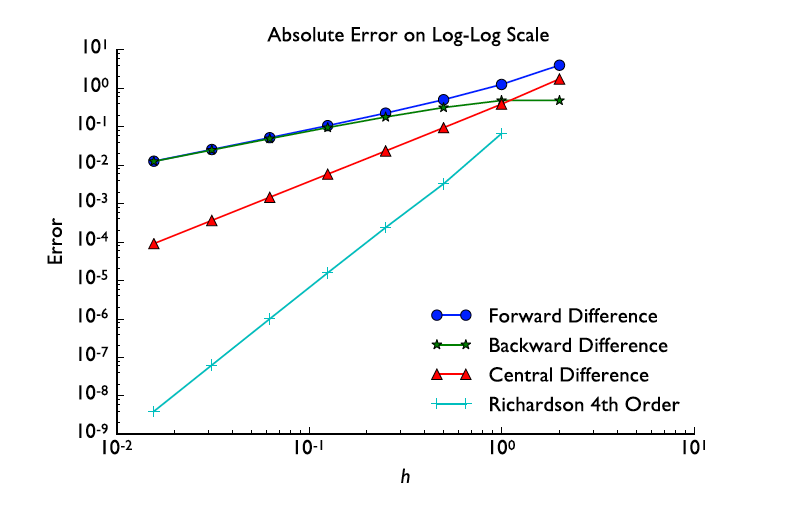

Notice that there is one fewer point in the Richardson line relative to the other lines because
it takes two estimates to apply Richardson extrapolation.

We can apply Richardson extrapolation again to get a sixth-order approximation (note that
we skip 5 just as we skipped 3). That is we apply the Richardson extrapolation function to
the estimate we computed using Richardson extrapolation on the central-difference estimate.
The results from this double-extrapolation yield a slope of about 6, as expected:

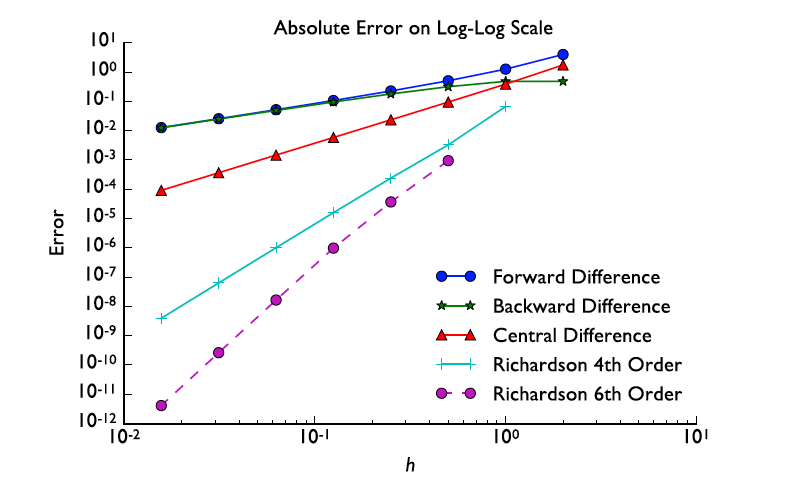

We can apply Richardson extrapolation again to get an eighth-order approximation:

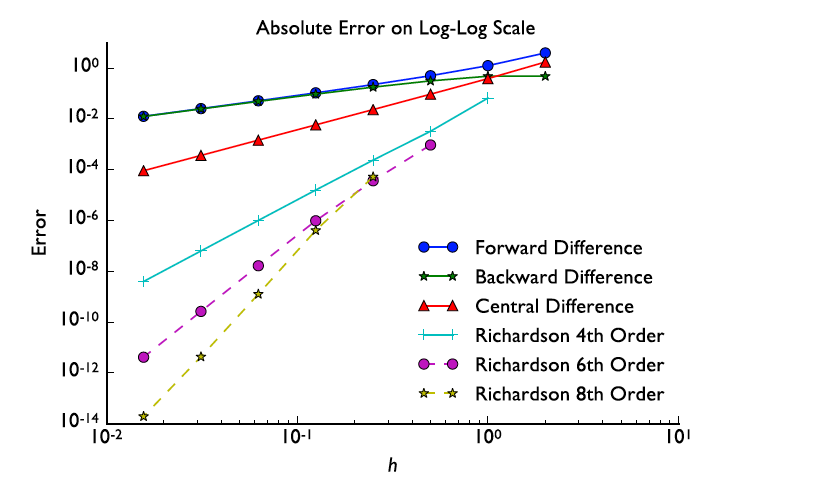

In this case the slope between the last two points is 7.807. This is because floating point
precision is starting to affect the estimate.

The overall results are pretty compelling: the 8th-order approximation is about 10 orders
of magnitude better than the original central difference approximation at the finest level of $h$.
The only trade-off is that the original central difference needs two points to approximate the
derivative and the eighth-order extrapolated value needs several central difference approximations
to get the accurate answer it does.

Richardson extrapolation is a powerful tool to have in your numerical toolkit. All you need
to know is an estimate of the order of accuracy for your base method and the level by which
you refined $h$. Knowing this and computing several approximations, you can combine them
with Richardson extrapolation to get a better answer.

